In [15]:
import pandas as pd
import numpy as np

# Series
s = pd.Series([1,3,6,np.nan,44,1])
s
# 0     1.0
# 1     3.0
# 2     6.0
# 3     NaN
# 4    44.0
# 5     1.0
# dtype: float64
#  默认index 从0开始
s = pd.Series([1,3,6,np.nan,44,1], index=[1,2,3,4,5,6])
s
# 1     1.0
# 2     3.0
# 3     6.0
# 4     NaN
# 5    44.0
# 6     1.0
# dtype: float64

## DataFrame
# DataFrame的简单运用
dates = pd.date_range('2018-08-19', periods=6)
# dates = pd.date_range('2018-08-19', '2018-08-24') # 与上述等价
'''
numpy.random.randn(d0,d1,...,dn)是从标准正态分布中返回一个或多个样本值
numpy.random.rand(d0,d1,...,dn)的随机样本位于[0,1)中
'''
dates
# DatetimeIndex(['2018-08-19', '2018-08-20', '2018-08-21', '2018-08-22',
#               '2018-08-23', '2018-08-24'],
#              dtype='datetime64[ns]', freq='D')
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=['a','b','c','d'])
# print(df)
# DataFrame既有行索引，也有列索引，它可以被看做是由Series组成的大字典
#                    a         b         c         d
# 2018-08-19  0.648755  1.484020 -1.821316  2.172458
# 2018-08-20  0.020307 -1.859903 -1.263009 -0.288041
# 2018-08-21  1.371007 -1.865819 -0.941401  0.868387
# 2018-08-22  1.584660 -0.491576  2.150652  0.809606
# 2018-08-23 -0.946927 -1.200441 -0.923433  0.342555
# 2018-08-24  0.216628 -1.683226  0.559594 -0.060602

# print(df['b'])
# 2018-08-19   -2.974029
# 2018-08-20   -0.087403
# 2018-08-21   -0.144798
# 2018-08-22   -1.103359
# 2018-08-23   -2.771889
# 2018-08-24   -0.032301
# Freq: D, Name: b, dtype: float64

# 未指定行标签和列标签的数据
df1 = pd.DataFrame(np.arange(12).reshape(3,4))
# print(df1)
#    0  1   2   3
# 0  0  1   2   3
# 1  4  5   6   7
# 2  8  9  10  11

df2 = pd.DataFrame({
    'A': [1,2,3,4],
    'B': pd.Timestamp('20180819'),
    'C': pd.Series([1,6,9,10], dtype='float32'),
    'D': np.array([3] * 4, dtype='int32'),
    'E': pd.Categorical(['test','train','test','train']),
    'F': 'foo'
})
# print(df2)
#    A          B     C  D      E    F
# 0  1 2018-08-19   1.0  3   test  foo
# 1  2 2018-08-19   6.0  3  train  foo
# 2  3 2018-08-19   9.0  3   test  foo
# 3  4 2018-08-19  10.0  3  train  foo

# print(df2.index)
# RangeIndex(start=0, stop=4, step=1)

# print(df2.columns)
# Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

# print(df2.values)
# [[1 Timestamp('2018-08-19 00:00:00') 1.0 3 'test' 'foo']
# [2 Timestamp('2018-08-19 00:00:00') 6.0 3 'train' 'foo']
# [3 Timestamp('2018-08-19 00:00:00') 9.0 3 'test' 'foo']
# [4 Timestamp('2018-08-19 00:00:00') 10.0 3 'train' 'foo']]

# 数据总结
# print(df2.describe())
#               A          C    D
# count  4.000000   4.000000  4.0
# mean   2.500000   6.500000  3.0
# std    1.290994   4.041452  0.0
# min    1.000000   1.000000  3.0
# 25%    1.750000   4.750000  3.0
# 50%    2.500000   7.500000  3.0
# 75%    3.250000   9.250000  3.0
# max    4.000000  10.000000  3.0

# 翻转数据
df2.T
# np.transpose(df2) 等价于上述操作

,0,1,2,3
A,1,2,3,4
B,2018-08-19 00:00:00,2018-08-19 00:00:00,2018-08-19 00:00:00,2018-08-19 00:00:00
C,1.0,6.0,9.0,10.0
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [16]:
'''
    axis=1 表示行
    axis=0 表示列
    默认ascending(升序)为True
'''
df2.sort_index(axis=1, ascending=True)

,A,B,C,D,E,F
0,1,2018-08-19,1.0,3,test,foo
1,2,2018-08-19,6.0,3,train,foo
2,3,2018-08-19,9.0,3,test,foo
3,4,2018-08-19,10.0,3,train,foo


In [19]:
df2.sort_index(axis=1, ascending=False)

,F,E,D,C,B,A
0,foo,test,3,1.0,2018-08-19,1
1,foo,train,3,6.0,2018-08-19,2
2,foo,test,3,9.0,2018-08-19,3
3,foo,train,3,10.0,2018-08-19,4


In [20]:
df2.sort_index(axis=0,ascending=True)

,A,B,C,D,E,F
0,1,2018-08-19,1.0,3,test,foo
1,2,2018-08-19,6.0,3,train,foo
2,3,2018-08-19,9.0,3,test,foo
3,4,2018-08-19,10.0,3,train,foo


In [21]:
df2.sort_index(axis=0, ascending=False)

,A,B,C,D,E,F
3,4,2018-08-19,10.0,3,train,foo
2,3,2018-08-19,9.0,3,test,foo
1,2,2018-08-19,6.0,3,train,foo
0,1,2018-08-19,1.0,3,test,foo


In [22]:
# 对特定列数值排序
df2.sort_values(by='C', ascending=False)

,A,B,C,D,E,F
3,4,2018-08-19,10.0,3,train,foo
2,3,2018-08-19,9.0,3,test,foo
1,2,2018-08-19,6.0,3,train,foo
0,1,2018-08-19,1.0,3,test,foo


In [24]:
# pandas选择数据
dates = pd.date_range('20220127', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2022-01-27,0,1,2,3
2022-01-28,4,5,6,7
2022-01-29,8,9,10,11
2022-01-30,12,13,14,15
2022-01-31,16,17,18,19
2022-02-01,20,21,22,23


In [25]:
df['A']

2022-01-27     0
2022-01-28     4
2022-01-29     8
2022-01-30    12
2022-01-31    16
2022-02-01    20
Freq: D, Name: A, dtype: int32

In [27]:
df.A

2022-01-27     0
2022-01-28     4
2022-01-29     8
2022-01-30    12
2022-01-31    16
2022-02-01    20
Freq: D, Name: A, dtype: int32

In [29]:
df[0:2]

,A,B,C,D
2022-01-27,0,1,2,3
2022-01-28,4,5,6,7


In [31]:
df['2022-01-27':'2022-01-29']

,A,B,C,D
2022-01-27,0,1,2,3
2022-01-28,4,5,6,7
2022-01-29,8,9,10,11


In [33]:
# 根据标签选择数据
# 获取特定行或列
# 指定行数据
df.loc['20220127']
# 同df.loc['2022-01-27']

A    0
B    1
C    2
D    3
Name: 2022-01-27 00:00:00, dtype: int32

In [34]:
# 指定列数据
df.loc[:,'A']

2022-01-27     0
2022-01-28     4
2022-01-29     8
2022-01-30    12
2022-01-31    16
2022-02-01    20
Freq: D, Name: A, dtype: int32

In [35]:
df.loc[:,['A','C']]

,A,C
2022-01-27,0,2
2022-01-28,4,6
2022-01-29,8,10
2022-01-30,12,14
2022-01-31,16,18
2022-02-01,20,22


In [36]:
df.loc[:,'A':'C']

,A,B,C
2022-01-27,0,1,2
2022-01-28,4,5,6
2022-01-29,8,9,10
2022-01-30,12,13,14
2022-01-31,16,17,18
2022-02-01,20,21,22


In [37]:
df.loc['20220127','A']

0

In [38]:
df.loc[['20220127','20220129'],['A','C']]

,A,C
2022-01-27,0,2
2022-01-29,8,10


In [39]:
# 根据序列iloc
# 获取特定位置的值
df.iloc[3,1]

13

In [40]:
df.iloc[3:5,1:3]  # 不包含末尾的5和3，同列表切片

,B,C
2022-01-30,13,14
2022-01-31,17,18


In [41]:
df.iloc[[1,3,5],[1,3]]

,B,D
2022-01-28,5,7
2022-01-30,13,15
2022-02-01,21,23


In [42]:
df.ix[:3, ['A','C']]

AttributeError: 'DataFrame' object has no attribute 'ix'

In [43]:
df[df.A > 0]

,A,B,C,D
2022-01-28,4,5,6,7
2022-01-29,8,9,10,11
2022-01-30,12,13,14,15
2022-01-31,16,17,18,19
2022-02-01,20,21,22,23


In [44]:
df.loc[df.A > 0]

,A,B,C,D
2022-01-28,4,5,6,7
2022-01-29,8,9,10,11
2022-01-30,12,13,14,15
2022-01-31,16,17,18,19
2022-02-01,20,21,22,23


In [45]:
# Pandas设置值
df

,A,B,C,D
2022-01-27,0,1,2,3
2022-01-28,4,5,6,7
2022-01-29,8,9,10,11
2022-01-30,12,13,14,15
2022-01-31,16,17,18,19
2022-02-01,20,21,22,23


In [46]:
df.iloc[2,2] = 111
df.loc['20220127','B'] = 222
df

,A,B,C,D
2022-01-27,0,222,2,3
2022-01-28,4,5,6,7
2022-01-29,8,9,111,11
2022-01-30,12,13,14,15
2022-01-31,16,17,18,19
2022-02-01,20,21,22,23


In [47]:
# 根据条件设置
df.B[df.A > 4] = 0
df

,A,B,C,D
2022-01-27,0,222,2,3
2022-01-28,4,5,6,7
2022-01-29,8,0,111,11
2022-01-30,12,0,14,15
2022-01-31,16,0,18,19
2022-02-01,20,0,22,23


In [48]:
df.B.loc[df.A>4] = 1
df

,A,B,C,D
2022-01-27,0,222,2,3
2022-01-28,4,5,6,7
2022-01-29,8,1,111,11
2022-01-30,12,1,14,15
2022-01-31,16,1,18,19
2022-02-01,20,1,22,23


In [49]:
# 按行或者列设置
df['F'] = np.nan
df

,A,B,C,D,F
2022-01-27,0,222,2,3,NaN
2022-01-28,4,5,6,7,NaN
2022-01-29,8,1,111,11,NaN
2022-01-30,12,1,14,15,NaN
2022-01-31,16,1,18,19,NaN
2022-02-01,20,1,22,23,NaN


In [51]:
# 添加Series序列，长度必须对齐
df['E'] = pd.Series([1,2,3,4,5,6], index=pd.date_range('20220127', periods=6))
df

,A,B,C,D,F,E
2022-01-27,0,222,2,3,NaN,1
2022-01-28,4,5,6,7,NaN,2
2022-01-29,8,1,111,11,NaN,3
2022-01-30,12,1,14,15,NaN,4
2022-01-31,16,1,18,19,NaN,5
2022-02-01,20,1,22,23,NaN,6


In [52]:
# 设定某行某列为特定值
df.loc['20220128','A'] = 100
df

,A,B,C,D,F,E
2022-01-27,0,222,2,3,NaN,1
2022-01-28,100,5,6,7,NaN,2
2022-01-29,8,1,111,11,NaN,3
2022-01-30,12,1,14,15,NaN,4
2022-01-31,16,1,18,19,NaN,5
2022-02-01,20,1,22,23,NaN,6


In [53]:
df.iloc[0,0] = 50
df

,A,B,C,D,F,E
2022-01-27,50,222,2,3,NaN,1
2022-01-28,100,5,6,7,NaN,2
2022-01-29,8,1,111,11,NaN,3
2022-01-30,12,1,14,15,NaN,4
2022-01-31,16,1,18,19,NaN,5
2022-02-01,20,1,22,23,NaN,6


In [54]:
# 修改一整行数据
df.iloc[1] = np.nan
df

,A,B,C,D,F,E
2022-01-27,50.0,222.0,2.0,3.0,NaN,1.0
2022-01-28,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-29,8.0,1.0,111.0,11.0,NaN,3.0
2022-01-30,12.0,1.0,14.0,15.0,NaN,4.0
2022-01-31,16.0,1.0,18.0,19.0,NaN,5.0
2022-02-01,20.0,1.0,22.0,23.0,NaN,6.0


In [57]:
# Pandas处理丢失数据
df.dropna() #  默认删除所有含NaN的行

,A,B,C,D,F,E


In [58]:
dates = pd.date_range('20220127', periods=6)
df = pd.DataFrame(np.arange(24).reshape((6,4)), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2022-01-27,0,1,2,3
2022-01-28,4,5,6,7
2022-01-29,8,9,10,11
2022-01-30,12,13,14,15
2022-01-31,16,17,18,19
2022-02-01,20,21,22,23


In [59]:
df.iloc[1,1] = np.nan

In [60]:
df

,A,B,C,D
2022-01-27,0,1.0,2,3
2022-01-28,4,NaN,6,7
2022-01-29,8,9.0,10,11
2022-01-30,12,13.0,14,15
2022-01-31,16,17.0,18,19
2022-02-01,20,21.0,22,23


In [64]:
df.dropna(axis=1,how='any')
# ‘any’: 只要存在NaN就drop掉；‘all’: 必须全部是NaN才drop
# 0对行进行操作，1对列进行操作

,A,C,D
2022-01-27,0,2,3
2022-01-28,4,6,7
2022-01-29,8,10,11
2022-01-30,12,14,15
2022-01-31,16,18,19
2022-02-01,20,22,23


In [65]:
df

,A,B,C,D
2022-01-27,0,1.0,2,3
2022-01-28,4,NaN,6,7
2022-01-29,8,9.0,10,11
2022-01-30,12,13.0,14,15
2022-01-31,16,17.0,18,19
2022-02-01,20,21.0,22,23


In [66]:
df.fillna(value=0)

,A,B,C,D
2022-01-27,0,1.0,2,3
2022-01-28,4,0.0,6,7
2022-01-29,8,9.0,10,11
2022-01-30,12,13.0,14,15
2022-01-31,16,17.0,18,19
2022-02-01,20,21.0,22,23


In [68]:
df

,A,B,C,D
2022-01-27,0,1.0,2,3
2022-01-28,4,NaN,6,7
2022-01-29,8,9.0,10,11
2022-01-30,12,13.0,14,15
2022-01-31,16,17.0,18,19
2022-02-01,20,21.0,22,23


In [67]:
# 是否有缺失数据NaN
# 是否为空
df.isnull()

,A,B,C,D
2022-01-27,False,False,False,False
2022-01-28,False,True,False,False
2022-01-29,False,False,False,False
2022-01-30,False,False,False,False
2022-01-31,False,False,False,False
2022-02-01,False,False,False,False


In [69]:
df.isna()

,A,B,C,D
2022-01-27,False,False,False,False
2022-01-28,False,True,False,False
2022-01-29,False,False,False,False
2022-01-30,False,False,False,False
2022-01-31,False,False,False,False
2022-02-01,False,False,False,False


In [70]:
# 检测某列是否有缺失数据NaN
df.isnull().any()

A    False
B     True
C    False
D    False
dtype: bool

In [71]:
# 检测数据中书否存在NaN，如果存在，返回True
np.any(df.isnull())

True

In [72]:
# 导入数据
data = pd.read_csv('student.csv')
data

,student ID,name,age,gender
0,1100,Kelly,22,Female
1,1101,Clo,21,Female
2,1102,Tilly,22,Female
3,1103,Tony,24,Male
4,1104,David,20,Male
5,1105,Catty,22,Female
6,1106,M,3,Female
7,1107,N,43,Male
8,1108,A,13,Male
9,1109,S,12,Male


In [73]:
data.head(3)

,student ID,name,age,gender
0,1100,Kelly,22,Female
1,1101,Clo,21,Female
2,1102,Tilly,22,Female


In [74]:
data.tail(3)

,student ID,name,age,gender
11,1111,Dw,3,Female
12,1112,Q,23,Male
13,1113,W,21,Female


In [75]:
# 导出数据
# 将资料存取成pickle
data.to_pickle('student.pickle')

In [76]:
print(pd.read_pickle('student.pickle'))

    student ID   name  age  gender
0         1100  Kelly   22  Female
1         1101    Clo   21  Female
2         1102  Tilly   22  Female
3         1103   Tony   24    Male
4         1104  David   20    Male
5         1105  Catty   22  Female
6         1106      M    3  Female
7         1107      N   43    Male
8         1108      A   13    Male
9         1109      S   12    Male
10        1110  David   33    Male
11        1111     Dw    3  Female
12        1112      Q   23    Male
13        1113      W   21  Female


In [78]:
# 合并
# concat 方式
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
df1,df2,df3

(     a    b    c    d
 0  0.0  0.0  0.0  0.0
 1  0.0  0.0  0.0  0.0
 2  0.0  0.0  0.0  0.0,
      a    b    c    d
 0  1.0  1.0  1.0  1.0
 1  1.0  1.0  1.0  1.0
 2  1.0  1.0  1.0  1.0,
      a    b    c    d
 0  2.0  2.0  2.0  2.0
 1  2.0  2.0  2.0  2.0
 2  2.0  2.0  2.0  2.0)

In [79]:
res = pd.concat([df1,df2,df3], axis=0)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0


In [80]:
res = pd.concat([df1,df2,df3], axis=0, ignore_index=True)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0


In [84]:
# join方式
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'], index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['b','c','d','e'], index=[2,3,4])
df1, df2

(     a    b    c    d
 1  0.0  0.0  0.0  0.0
 2  0.0  0.0  0.0  0.0
 3  0.0  0.0  0.0  0.0,
      b    c    d    e
 2  1.0  1.0  1.0  1.0
 3  1.0  1.0  1.0  1.0
 4  1.0  1.0  1.0  1.0)

In [85]:
'''
join='outer',函数默认值；此方法是依照column来做纵向合并，有相同的column上下合并在一起
其他独自的column各自成列，原来没有值的位置皆为NaN填充
'''
res = pd.concat([df1,df2], axis=0, join='outer')
res

,a,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,NaN
2,NaN,1.0,1.0,1.0,1.0
3,NaN,1.0,1.0,1.0,1.0
4,NaN,1.0,1.0,1.0,1.0


In [86]:
res = pd.concat([df1, df2], axis=0, join='outer', ignore_index=True)
res

,a,b,c,d,e
0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,NaN,1.0,1.0,1.0,1.0
4,NaN,1.0,1.0,1.0,1.0
5,NaN,1.0,1.0,1.0,1.0


In [87]:
# join='inner'合并相同的字段
res = pd.concat([df1,df2], axis=0, join='inner')
res

,b,c,d
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [88]:
df1, df2

(     a    b    c    d
 1  0.0  0.0  0.0  0.0
 2  0.0  0.0  0.0  0.0
 3  0.0  0.0  0.0  0.0,
      b    c    d    e
 2  1.0  1.0  1.0  1.0
 3  1.0  1.0  1.0  1.0
 4  1.0  1.0  1.0  1.0)

In [89]:
res = pd.concat([df1,df2], axis=1, join_axes=[df1.index])
res

TypeError: concat() got an unexpected keyword argument 'join_axes'

In [90]:
res = pd.concat([df1,df2],axis=1)
res

,a,b,c,d,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0


In [93]:
# append(添加数据)
# 只有纵向合并，没有横向合并
df1 = pd.DataFrame(np.ones((3,4))*0, columns=['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns=['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns=['a','b','c','d'])
s1 = pd.Series([1,2,3,4], index=['a','b','c','d'])
res = df1.append(df2, ignore_index=True)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0


In [94]:
res = df1.append([df2,df3], ignore_index=True)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0


In [95]:
res = df1.append(s1, ignore_index=True)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,2.0,3.0,4.0


In [96]:
# Pandas合并merge
# 定义资料集并打印出来
left = pd.DataFrame({
    'key': ['K0','K1','K2','K3'],
    'A'  : ['A0','A1','A2','A3'],
    'B'  : ['B0','B1','B2','B3']
})
right = pd.DataFrame({
    'key': ['K0','K1','K2','K3'],
    'C'  : ['C0','C1','C2','C3'],
    'D'  : ['D0','D1','D2','D3']
})
left , right

(  key   A   B
 0  K0  A0  B0
 1  K1  A1  B1
 2  K2  A2  B2
 3  K3  A3  B3,
   key   C   D
 0  K0  C0  D0
 1  K1  C1  D1
 2  K2  C2  D2
 3  K3  C3  D3)

In [97]:
res = pd.merge(left,right,on='key')
res

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [98]:
left = pd.DataFrame({
    'key1': ['K0','K1','K2','K3'],
    'key2': ['K0','K1','K0','K1'],
    'A'  : ['A0','A1','A2','A3'],
    'B'  : ['B0','B1','B2','B3']
})
right = pd.DataFrame({
    'key1': ['K0','K1','K2','K3'],
    'key2': ['K0','K0','K0','K0'],
    'C'  : ['C0','C1','C2','C3'],
    'D'  : ['D0','D1','D2','D3']
})
res = pd.merge(left,right, on = ['key1','key2'], how='inner')
res

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K2,K0,A2,B2,C2,D2


In [99]:
res = pd.merge(left,right, on=['key1','key2'], how='outer')
res

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,NaN,NaN
2,K2,K0,A2,B2,C2,D2
3,K3,K1,A3,B3,NaN,NaN
4,K1,K0,NaN,NaN,C1,D1
5,K3,K0,NaN,NaN,C3,D3


In [100]:
res = pd.merge(left,right,on=['key1','key2'],how='right')
res

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,NaN,NaN,C1,D1
2,K2,K0,A2,B2,C2,D2
3,K3,K0,NaN,NaN,C3,D3


In [101]:
res = pd.merge(left,right,on=['key1','key2'],how='left')
res

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K1,A1,B1,NaN,NaN
2,K2,K0,A2,B2,C2,D2
3,K3,K1,A3,B3,NaN,NaN


In [102]:
# Indicator设置并列名称
df1 = pd.DataFrame({'col1':[0,1],'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
df1,df2

(   col1 col_left
 0     0        a
 1     1        b,
    col1  col_right
 0     1          2
 1     2          2
 2     2          2)

In [103]:
# 依据col1进行合并，并启用indicator=True
res = pd.merge(df1,df2,on='col1',how='outer',indicator=True)
res

,col1,col_left,col_right,_merge
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [104]:
res = pd.merge(df1,df2,on='col1',how='outer',indicator=False)
res

,col1,col_left,col_right
0,0,a,NaN
1,1,b,2.0
2,2,NaN,2.0
3,2,NaN,2.0


In [106]:
res = pd.merge(df1,df2,on='col1',how='outer')
res

,col1,col_left,col_right
0,0,a,NaN
1,1,b,2.0
2,2,NaN,2.0
3,2,NaN,2.0


In [107]:
# 自定义indicator column的名称
res = pd.merge(df1,df2,on='col1',how='outer',indicator='indicator_column')
res

,col1,col_left,col_right,indicator_column
0,0,a,NaN,left_only
1,1,b,2.0,both
2,2,NaN,2.0,right_only
3,2,NaN,2.0,right_only


In [109]:
# 依据index合并
left = pd.DataFrame({
    'A'  : ['A0','A1','A2'],
    'B'  : ['B0','B1','B2']},
    index=['K0','K1','K2'])
right = pd.DataFrame({
    'C'  : ['C0','C2','C3'],
    'D'  : ['D0','D2','D3']},
    index=['K0','K2','K3'])

left,right

(     A   B
 K0  A0  B0
 K1  A1  B1
 K2  A2  B2,
      C   D
 K0  C0  D0
 K2  C2  D2
 K3  C3  D3)

In [110]:
res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
res

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [111]:
res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
res

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


In [112]:
# 解决overlapping的问题
boys = pd.DataFrame({'k':['K0','K1','K2'],'age':[1,2,3]})
girls = pd.DataFrame({'k':['K0','K0','K3'],'age':[4,5,6]})
boys,girls

(    k  age
 0  K0    1
 1  K1    2
 2  K2    3,
     k  age
 0  K0    4
 1  K0    5
 2  K3    6)

In [114]:
# 使用suffixes解决overlapping的问题
res = pd.merge(boys, girls, on='k')
res

,k,age_x,age_y
0,K0,1,4
1,K0,1,5


In [115]:
res = pd.merge(boys, girls, on='k', how='outer')
res

,k,age_x,age_y
0,K0,1.0,4.0
1,K0,1.0,5.0
2,K1,2.0,NaN
3,K2,3.0,NaN
4,K3,NaN,6.0


In [118]:
res = pd.merge(boys, girls, on='k',suffixes=['_boy','_girl'],how='inner')
res

,k,age_girl,age_boy
0,K0,1,4
1,K0,1,5


In [119]:
# Pandas plot
import matplotlib.pyplot as plt
data = pd.DataFrame(np.random.randn(1000), index=np.arange(1000))
data

,0
0,-1.737121
1,-1.046341
2,-1.273401
3,1.568063
4,0.455022
...,...
995,0.393464
996,-0.682385
997,0.822587
998,1.006966


In [120]:
data.cumsum()

,0
0,-1.737121
1,-2.783462
2,-4.056863
3,-2.488799
4,-2.033778
...,...
995,-34.449096
996,-35.131481
997,-34.308894
998,-33.301928


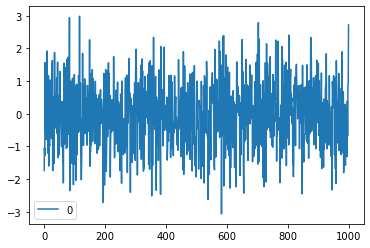

In [123]:
data.plot()
plt.show()

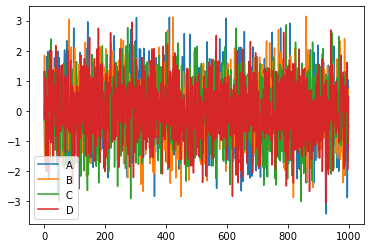

In [125]:
data = pd.DataFrame(
    np.random.randn(1000,4),
    index = np.arange(1000),
    columns=list("ABCD")
)
data.cumsum()
data.plot()
plt.show()

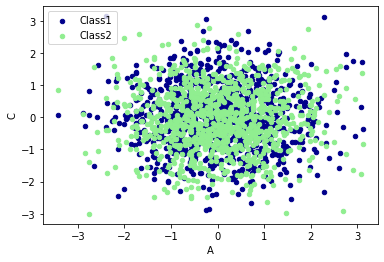

In [127]:
ax = data.plot.scatter(x='A',y='B',color='DarkBlue',label='Class1')
data.plot.scatter(x='A',y='C',color='LightGreen',label='Class2', ax=ax)
plt.show()